In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


Text(0, 0.5, 'Y dataset')

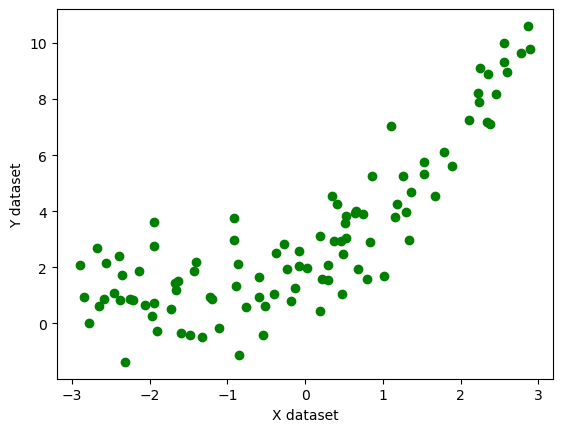

In [3]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)
# quadratic equation used- y = 0.5x^2 + 1.5x + 2 + outliers
plt.scatter(X, y, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [4]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [5]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [6]:
regression_1.fit(X_Train, Y_Train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(Y_Test, regression_1.predict(X_Test))
print(score)

0.6848976194952612


Text(0, 0.5, 'Y dataset')

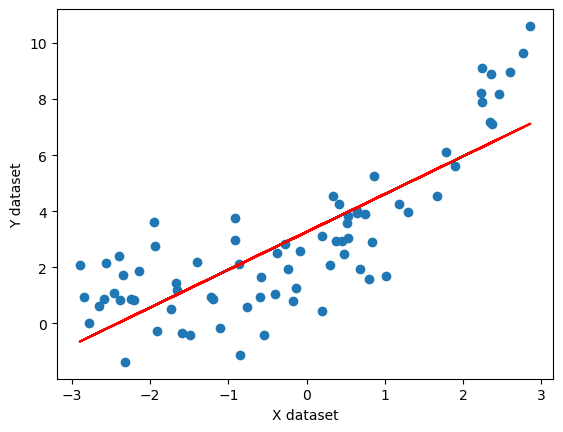

In [8]:
#visualize the model
plt.plot(X_Train, regression_1.predict(X_Train), color='r')
plt.scatter(X_Train, Y_Train)
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly2 = PolynomialFeatures(degree = 2, include_bias = True)
X_Train_poly2 = poly2.fit_transform(X_Train)
X_Test_poly2 = poly2.transform(X_Test)

In [11]:
regression2 = LinearRegression()
regression2.fit(X_Train_poly2, Y_Train)
Y_Pred = regression2.predict(X_Test_poly2)
score_poly2 = r2_score(Y_Test, Y_Pred)
print(score_poly2)

0.8907247986879714


In [12]:
print(regression2.coef_)
print(regression2.intercept_)

[[0.         1.46169905 0.44222388]]
[2.09373907]


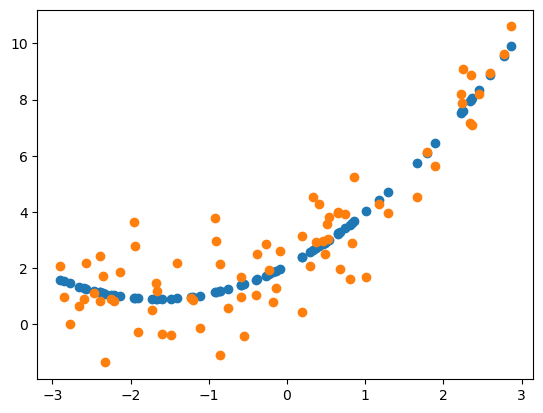

In [13]:
plt.scatter(X_Train, regression2.predict(X_Train_poly2))
plt.scatter(X_Train, Y_Train)

In [14]:
poly3 = PolynomialFeatures(degree = 3, include_bias = True)
X_Train_poly3 = poly3.fit_transform(X_Train)
X_Test_poly3 = poly3.transform(X_Test)

In [15]:
regression3 = LinearRegression()
regression3.fit(X_Train_poly3, Y_Train)
Y_Pred3 = regression3.predict(X_Test_poly3)
score_poly3 = r2_score(Y_Test, Y_Pred3)
print(score_poly3)

0.8867476491001687


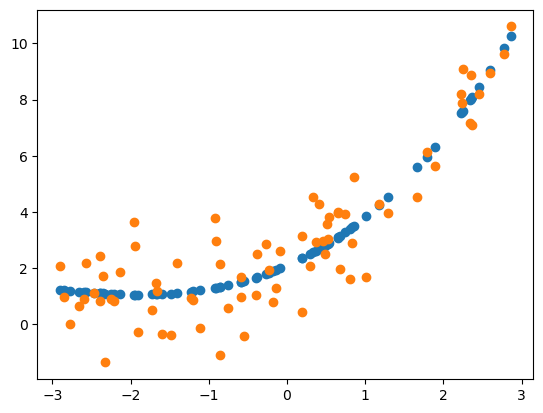

In [16]:
plt.scatter(X_Train, regression3.predict(X_Train_poly3))
plt.scatter(X_Train, Y_Train)

In [17]:
# prediction of new data
X_New = np.linspace(-3,3,200).reshape(200,1)
X_New_Poly2 = poly2.transform(X_New)
X_New_Poly3 = poly3.transform(X_New)

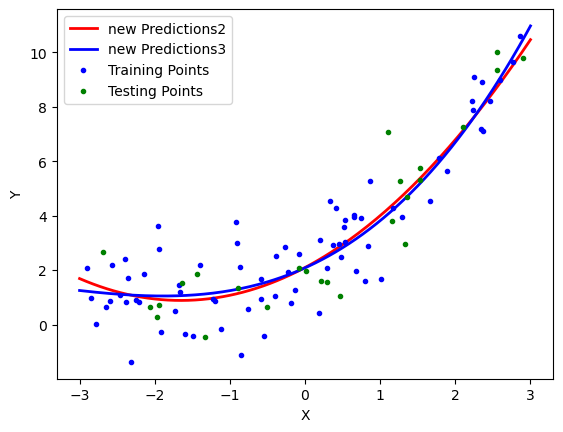

In [18]:
Y_New2 = regression2.predict(X_New_Poly2)
plt.plot(X_New, Y_New2, "r-", linewidth = 2, label = 'new Predictions2')
Y_New3 = regression3.predict(X_New_Poly3)
plt.plot(X_New, Y_New3, "b-", linewidth = 2, label = 'new Predictions3')
# Replace these lines:
# plt.plot(X_Train_poly2, Y_Train, "b.", linewidth = 2, label = 'Training Points')
# plt.plot(X_Test_poly2, Y_Test, "g.", linewidth = 2, label = 'Testing Points')

# With these:
plt.plot(X_Train, Y_Train, "b.", linewidth = 2, label = 'Training Points')
plt.plot(X_Test, Y_Test, "g.", linewidth = 2, label = 'Testing Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Pipeline

In [19]:
from sklearn.pipeline import Pipeline

In [39]:
def poly_regression(degree):
    X_new2 = np.linspace(-3, 3, 200).reshape(200, 1)
    X_new_poly = poly2.transform(X_new2)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_Train_poly2, Y_Train)
    y_pred_new = poly_regression.predict(X_new_poly)
    # plotting prediction line
    plt.plot(X_new2, y_pred_new, 'r', label = "Degree " + str(degree), linewidth = 3)
    plt.plot(X_Train, Y_Train, "b.", linewidth = 3)
    plt.plot(X_Test, Y_Test, "g.", linewidth = 3)
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

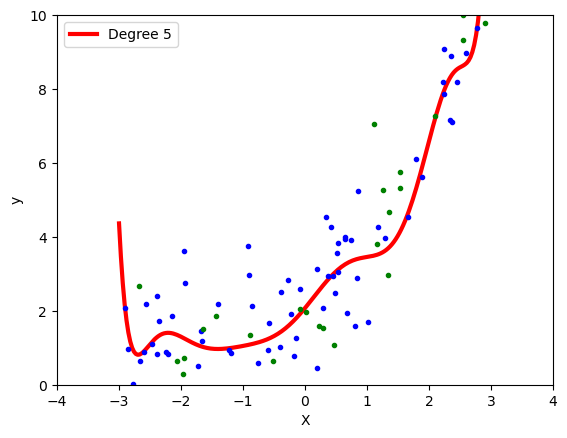

In [40]:
poly_regression(5)